In [1]:
import os
os.chdir("drive/MyDrive/fyp/src")

In [2]:
from data import PolygonSentenceReader, Polygon
from modules import NLLLoss, ELBOLoss
from neural_process.models.np import CNP, LNP
from neural_process.models.attnnp import AttnCNP, AttnLNP
from utils import plot_polygon

import datetime
import random
import torch
import torch.nn as nn
from torch.distributions.kl import kl_divergence

In [16]:
TRAINING_ITERATIONS = int(2e5)
PLOT_AFTER = int(2e4)
BATCH_SIZE = 64
MAX_CONTEXT_POINTS = 10
torch.manual_seed(0)

criterion = ELBOLoss()

# Instantiate a polygon generator.
# (For example, polygons with between 3 and 8 sides.)
polygon_generator_train = PolygonSentenceReader(
    batch_size=BATCH_SIZE,
    max_num_context=MAX_CONTEXT_POINTS,
    max_seq_len=1 + 4 * 3,
    min_num_sides=3,
    max_num_sides=3,
    center=(5, 5),
    radius=3,
    testing=False,
)

polygon_generator_test = PolygonSentenceReader(
    batch_size=100,
    max_num_context=MAX_CONTEXT_POINTS,
    max_seq_len=1 + 4 * 3,
    min_num_sides=3,
    max_num_sides=3,
    center=(5, 5),
    radius=3,
    testing=True,
)

2025-04-08 17:14:43, Iteration: 0, Train Loss: 6014676.5
2025-04-08 17:14:43, Iteration: 0, Test Loss: 6014676.5
True Polygon:  Polygon(n=3, vertices=[(7.75, 6.2), (4.28, 2.09), (7.39, 3.18)], lengths=[5.378940416104272, 3.2954817553735594, 3.04138126514911], angles=[33.37592585620245, 30.511530312198126, 116.11254383159941])
Predicted Polygon Vertices:  Polygon(n=3, vertices=[(-8.957563400268555, 19.89127540588379), (16.559755325317383, -39.860103607177734), (-36.59056091308594, -21.79709815979004)], lengths=[-27.678680419921875, 23.08687973022461, 17.98566246032715], angles=[-52.31807327270508, 3.7070271968841553, -24.613910675048828])


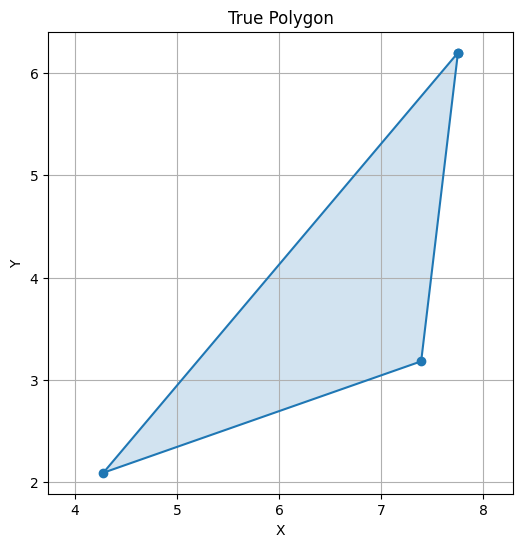

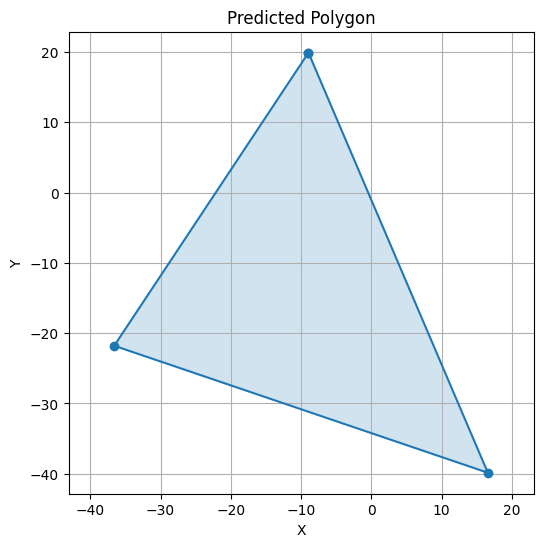

2025-04-08 17:15:25, Iteration: 1000, Train Loss: 3707.46435546875
2025-04-08 17:16:07, Iteration: 2000, Train Loss: 1403.367431640625
2025-04-08 17:16:51, Iteration: 3000, Train Loss: 669.5933837890625
2025-04-08 17:17:35, Iteration: 4000, Train Loss: 535.7237548828125
2025-04-08 17:18:18, Iteration: 5000, Train Loss: 77.52372741699219
2025-04-08 17:19:01, Iteration: 6000, Train Loss: 112.82926177978516
2025-04-08 17:19:43, Iteration: 7000, Train Loss: 14.809966087341309
2025-04-08 17:20:26, Iteration: 8000, Train Loss: 9.121075630187988
2025-04-08 17:21:09, Iteration: 9000, Train Loss: 38.16008758544922
2025-04-08 17:21:52, Iteration: 10000, Train Loss: 6.588184356689453
2025-04-08 17:22:34, Iteration: 11000, Train Loss: 15.336353302001953
2025-04-08 17:23:17, Iteration: 12000, Train Loss: 5.588289260864258
2025-04-08 17:23:59, Iteration: 13000, Train Loss: 4.385862350463867
2025-04-08 17:24:41, Iteration: 14000, Train Loss: 7.663694858551025
2025-04-08 17:25:24, Iteration: 15000, Tr

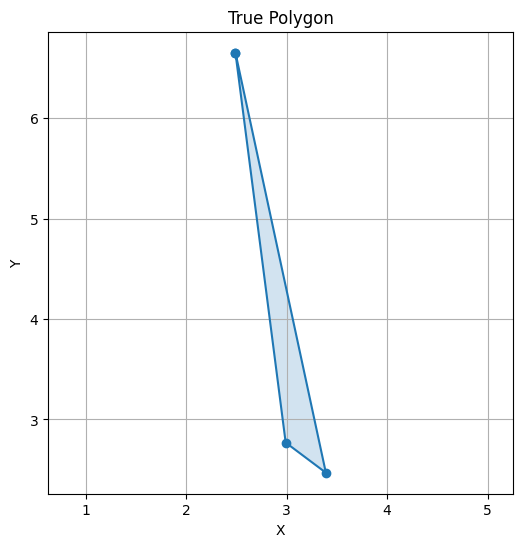

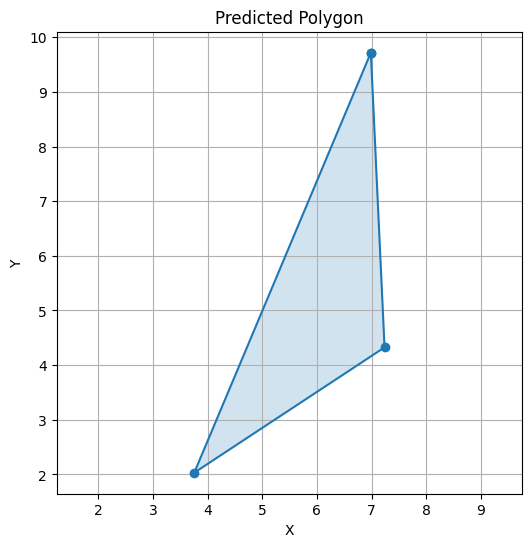

2025-04-08 17:29:39, Iteration: 21000, Train Loss: 2.9649462699890137
2025-04-08 17:30:21, Iteration: 22000, Train Loss: 2.576700210571289
2025-04-08 17:31:03, Iteration: 23000, Train Loss: 2.3983473777770996
2025-04-08 17:31:46, Iteration: 24000, Train Loss: 2.582998514175415
2025-04-08 17:32:28, Iteration: 25000, Train Loss: 2.557523012161255
2025-04-08 17:33:10, Iteration: 26000, Train Loss: 1.8156869411468506
2025-04-08 17:33:53, Iteration: 27000, Train Loss: 1.8106880187988281
2025-04-08 17:34:35, Iteration: 28000, Train Loss: 1.9498648643493652
2025-04-08 17:35:18, Iteration: 29000, Train Loss: 1.652439832687378
2025-04-08 17:36:01, Iteration: 30000, Train Loss: 1.49751615524292
2025-04-08 17:36:42, Iteration: 31000, Train Loss: 1.8722807168960571
2025-04-08 17:37:24, Iteration: 32000, Train Loss: 1.222419023513794
2025-04-08 17:38:06, Iteration: 33000, Train Loss: 1.2980650663375854
2025-04-08 17:38:48, Iteration: 34000, Train Loss: 1.1509439945220947
2025-04-08 17:39:30, Iterat

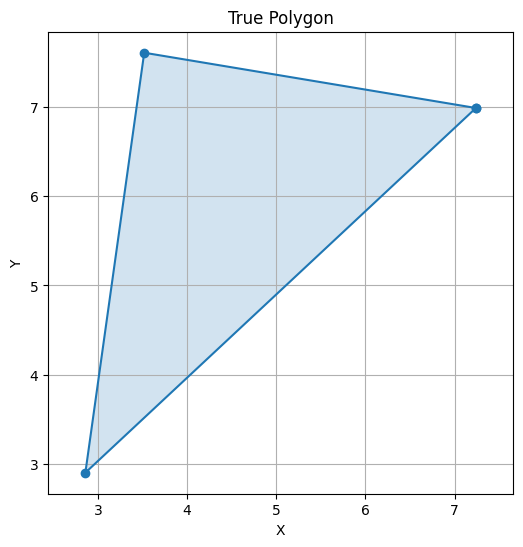

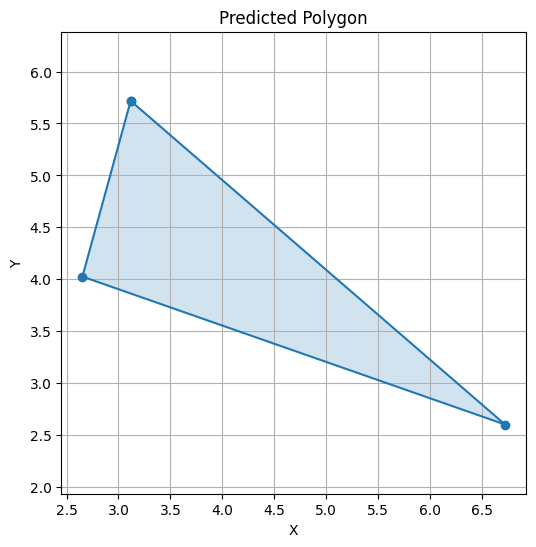

2025-04-08 17:43:43, Iteration: 41000, Train Loss: 1.290600061416626
2025-04-08 17:44:25, Iteration: 42000, Train Loss: 0.9085264205932617
2025-04-08 17:45:07, Iteration: 43000, Train Loss: 0.7606801986694336
2025-04-08 17:45:50, Iteration: 44000, Train Loss: 0.9418559074401855
2025-04-08 17:46:32, Iteration: 45000, Train Loss: 0.9799319505691528
2025-04-08 17:47:15, Iteration: 46000, Train Loss: 0.4654761254787445
2025-04-08 17:47:58, Iteration: 47000, Train Loss: 0.5469440221786499
2025-04-08 17:48:40, Iteration: 48000, Train Loss: 0.4628022313117981
2025-04-08 17:49:24, Iteration: 49000, Train Loss: 0.7257598042488098
2025-04-08 17:50:06, Iteration: 50000, Train Loss: 0.7425286173820496
2025-04-08 17:50:49, Iteration: 51000, Train Loss: 0.8030555248260498
2025-04-08 17:51:31, Iteration: 52000, Train Loss: 0.41080307960510254
2025-04-08 17:52:13, Iteration: 53000, Train Loss: 0.667868971824646
2025-04-08 17:52:55, Iteration: 54000, Train Loss: 0.2981968820095062
2025-04-08 17:53:38, 

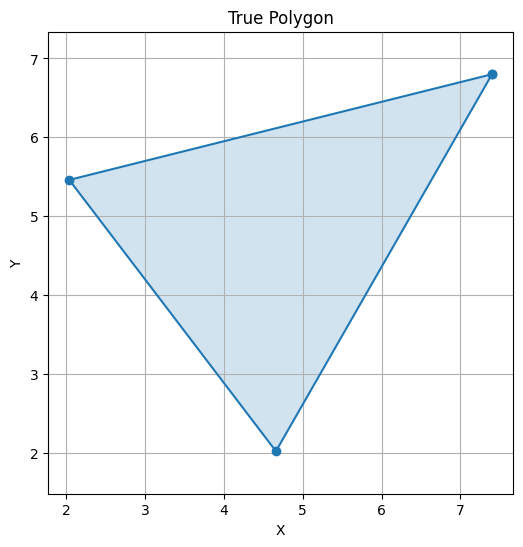

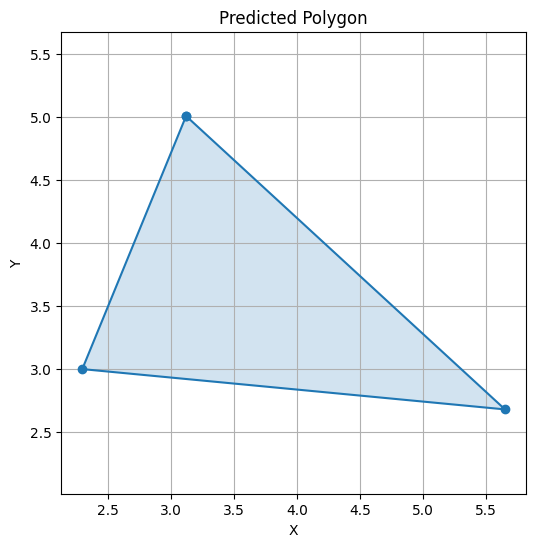

2025-04-08 17:57:54, Iteration: 61000, Train Loss: 0.35170185565948486
2025-04-08 17:58:37, Iteration: 62000, Train Loss: 0.2912997603416443
2025-04-08 17:59:19, Iteration: 63000, Train Loss: 0.025205936282873154
2025-04-08 18:00:01, Iteration: 64000, Train Loss: 0.38237228989601135
2025-04-08 18:00:45, Iteration: 65000, Train Loss: 0.06776162981987
2025-04-08 18:01:28, Iteration: 66000, Train Loss: 0.43150365352630615
2025-04-08 18:02:10, Iteration: 67000, Train Loss: 0.29368624091148376
2025-04-08 18:02:52, Iteration: 68000, Train Loss: 0.02920021302998066
2025-04-08 18:03:34, Iteration: 69000, Train Loss: 0.34772801399230957
2025-04-08 18:04:17, Iteration: 70000, Train Loss: -0.019444547593593597
2025-04-08 18:04:59, Iteration: 71000, Train Loss: 0.18133623898029327
2025-04-08 18:05:42, Iteration: 72000, Train Loss: 0.14724548161029816
2025-04-08 18:06:26, Iteration: 73000, Train Loss: -0.02368185669183731
2025-04-08 18:07:08, Iteration: 74000, Train Loss: 0.21754887700080872
2025-0

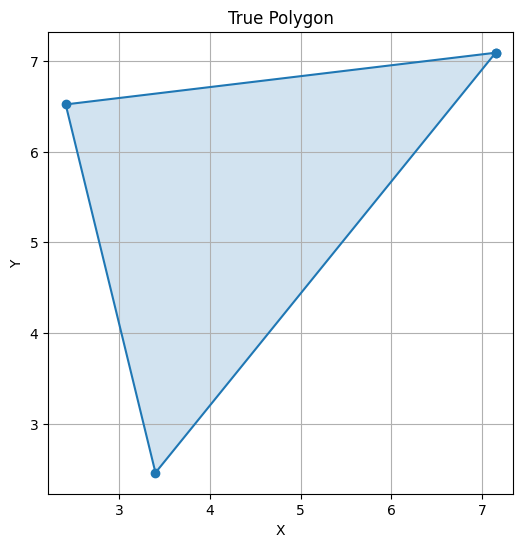

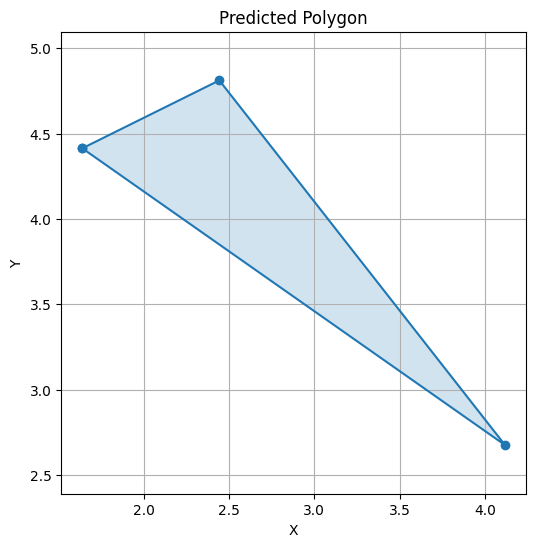

2025-04-08 18:12:05, Iteration: 81000, Train Loss: -0.2232588529586792
2025-04-08 18:12:47, Iteration: 82000, Train Loss: 0.011423278599977493
2025-04-08 18:13:30, Iteration: 83000, Train Loss: 0.14904968440532684
2025-04-08 18:14:12, Iteration: 84000, Train Loss: 0.31108567118644714
2025-04-08 18:14:54, Iteration: 85000, Train Loss: -0.14531204104423523
2025-04-08 18:15:37, Iteration: 86000, Train Loss: -0.25587281584739685
2025-04-08 18:16:19, Iteration: 87000, Train Loss: 0.11730426549911499
2025-04-08 18:17:02, Iteration: 88000, Train Loss: -0.4971347451210022
2025-04-08 18:17:44, Iteration: 89000, Train Loss: -0.19031769037246704
2025-04-08 18:18:28, Iteration: 90000, Train Loss: -0.021087653934955597
2025-04-08 18:19:10, Iteration: 91000, Train Loss: -0.3292785882949829
2025-04-08 18:19:53, Iteration: 92000, Train Loss: 0.15907436609268188
2025-04-08 18:20:35, Iteration: 93000, Train Loss: -0.18139100074768066
2025-04-08 18:21:18, Iteration: 94000, Train Loss: 0.13185840845108032

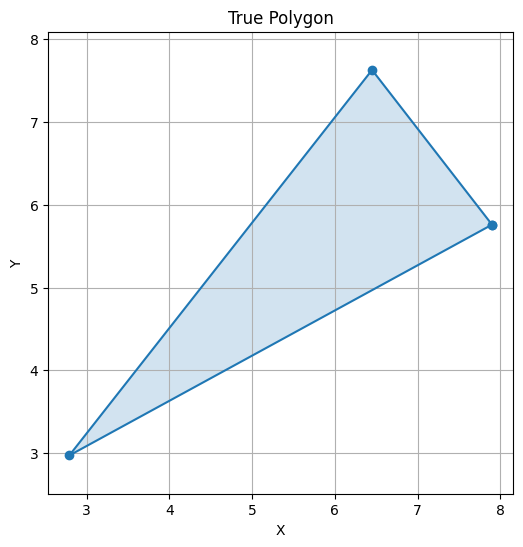

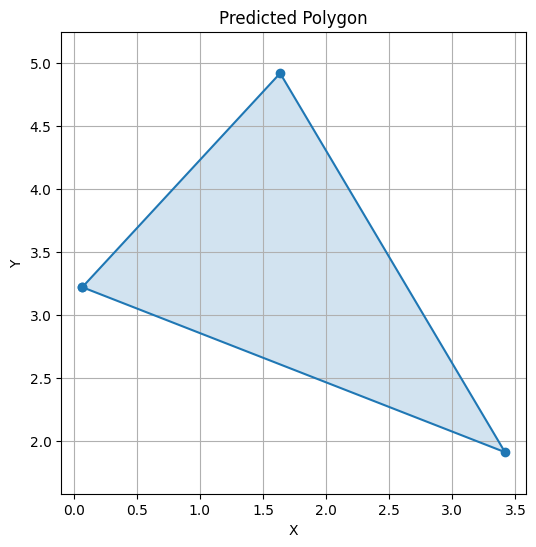

2025-04-08 18:26:15, Iteration: 101000, Train Loss: 0.10114161670207977
2025-04-08 18:26:58, Iteration: 102000, Train Loss: -0.2332509458065033
2025-04-08 18:27:41, Iteration: 103000, Train Loss: 0.0007864497601985931
2025-04-08 18:28:23, Iteration: 104000, Train Loss: -0.04582228139042854
2025-04-08 18:29:06, Iteration: 105000, Train Loss: 0.008087988942861557
2025-04-08 18:29:49, Iteration: 106000, Train Loss: -0.26545625925064087
2025-04-08 18:30:31, Iteration: 107000, Train Loss: 0.03991919010877609
2025-04-08 18:31:14, Iteration: 108000, Train Loss: -0.42256712913513184
2025-04-08 18:31:56, Iteration: 109000, Train Loss: -0.5783686637878418
2025-04-08 18:32:39, Iteration: 110000, Train Loss: -0.5491510629653931
2025-04-08 18:33:22, Iteration: 111000, Train Loss: -0.6791811585426331
2025-04-08 18:34:04, Iteration: 112000, Train Loss: -0.3729764223098755
2025-04-08 18:34:45, Iteration: 113000, Train Loss: -0.6468772292137146
2025-04-08 18:35:28, Iteration: 114000, Train Loss: -0.240

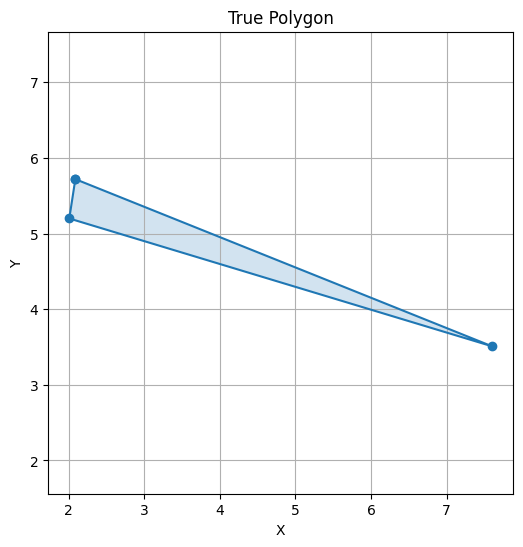

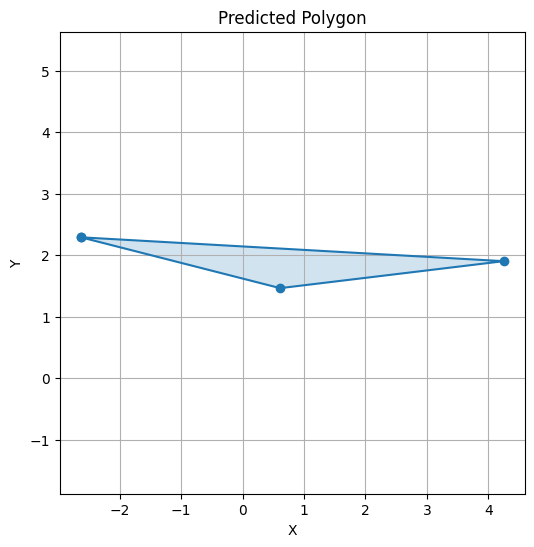

2025-04-08 18:40:26, Iteration: 121000, Train Loss: -0.6600208282470703
2025-04-08 18:41:09, Iteration: 122000, Train Loss: -0.5573476552963257
2025-04-08 18:41:51, Iteration: 123000, Train Loss: -0.7901041507720947
2025-04-08 18:42:34, Iteration: 124000, Train Loss: -0.6974477767944336
2025-04-08 18:43:16, Iteration: 125000, Train Loss: -0.8936827182769775
2025-04-08 18:44:00, Iteration: 126000, Train Loss: -0.8270174264907837
2025-04-08 18:44:42, Iteration: 127000, Train Loss: -0.8976482152938843
2025-04-08 18:45:25, Iteration: 128000, Train Loss: -0.8192948698997498
2025-04-08 18:46:08, Iteration: 129000, Train Loss: -0.7625038027763367
2025-04-08 18:46:51, Iteration: 130000, Train Loss: -0.34105774760246277


KeyboardInterrupt: 

In [17]:
model = LNP(x_dim=1 + 4 * 3, y_dim=1 + 4 * 3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
device = next(model.parameters()).device

# ----------------------
# Training Loop
# ----------------------
for it in range(TRAINING_ITERATIONS + 1):
    # Generate a batch of polygon completion tasks.
    (
        context_x,
        context_y,
        target_x,
        target_y,
        tokens,
        true_poly,
        max_seq_len,
        num_context,
    ) = polygon_generator_train.generate_polygon_batch_few_shot_completion_task()

    context_x = context_x.to(device)
    context_y = context_y.to(device)
    target_x = target_x.to(device)
    target_y = target_y.to(device)

    optimizer.zero_grad()
    # Forward pass: the NP model expects context_x, context_y, target_x, target_y.
    dist, z, q_zc, q_zct = model(context_x, context_y, target_x, target_y)
    loss = criterion(dist, q_zct, q_zc, target_y)
    loss.backward()
    optimizer.step()

    if it % 1000 == 0:
        print(
            "{}, Iteration: {}, Train Loss: {}".format(
                datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                it,
                loss.item(),
            )
        )

    # ----------------------
    # Evaluation and Plotting
    # ----------------------
    if it % PLOT_AFTER == 0:
        # For plotting, we generate a single polygon sample.
        (
            context_x_eval,
            context_y_eval,
            target_x_eval,
            target_y_eval,
            tokens_eval,
            true_poly_eval,
            max_seq_len_eval,
            num_context_eval,
        ) = polygon_generator_test.generate_polygon_batch_few_shot_completion_task()

        context_x_eval = context_x_eval.to(device)
        context_y_eval = context_y_eval.to(device)
        target_x_eval = target_x_eval.to(device)
        target_y_eval = target_y_eval.to(device)

        # Forward pass through the model.
        test_dist, test_z, test_q_zc, test_q_zct = model(
            context_x_eval, context_y_eval, target_x_eval, target_y_eval
        )
        loss = criterion(dist, q_zct, q_zc, target_y)

        # Get NP predictions on target tokens (taking the mean of the predictive distribution).
        pred_target = test_dist.mean  # shape: [n_z, batch, n_target, y_dim]

        # For simplicity, we average over latent samples and batch dimension.
        pred_target_avg = pred_target.mean(0)[0]  # shape: [n_target, y_dim]
        # print("pred_target_avg shape: ", pred_target_avg.shape)
        pred_target_avg = pred_target_avg[0]
        true_polygon = true_poly_eval[0]
        true_polygon_tokenised = true_polygon.to_tokenised()
        pred_target_avg = pred_target_avg[: len(true_polygon_tokenised)]
        # print("pred_target_avg shape after squeeze: ", pred_target_avg.shape)

        # Reconstruct polygons from tokens.
        predicted_polygon = Polygon.from_tokenised(pred_target_avg.tolist(), true_polygon_tokenised[0])

        print(
            "{}, Iteration: {}, Test Loss: {}".format(
                datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                it,
                loss.item(),
            )
        )

        print("True Polygon: ", true_polygon)
        print("Predicted Polygon Vertices: ", predicted_polygon)

        # Plot the true polygon and the predicted (completed) polygon.
        plot_polygon(true_polygon.vertices, title="True Polygon")
        try:
          plot_polygon(predicted_polygon.vertices, title="Predicted Polygon")
        except:
          print("Invalid polygon")
          continue